# Task 1: Prediction of student scores based on number of hours he spent to study 


In this we gave a dataset which contains two columns named as hours and scores. The hours describe the studying time of students and scores describe the marks students obtained. 
Our task is to use simple regression algorithm and train the dataset. Then predict the results with hours given as 9.25. The output should be given as the score the student got based onthe tested hours. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url= "http://bit.ly/w-data"
df= pd.read_csv(url)

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

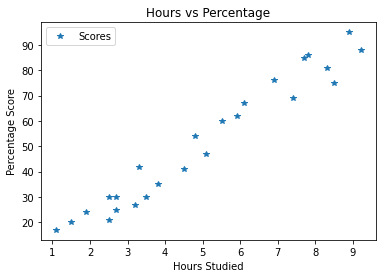

In [6]:
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

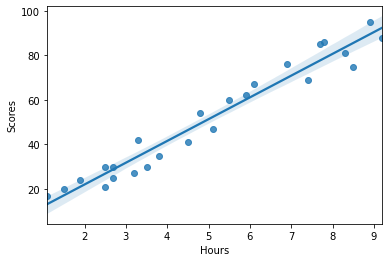

In [7]:
sns.regplot(x="Hours", y="Scores", data=df);

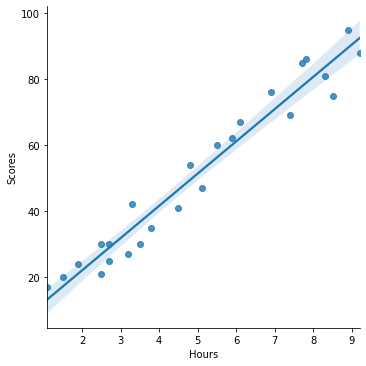

In [8]:
sns.lmplot(x="Hours", y="Scores", data=df);

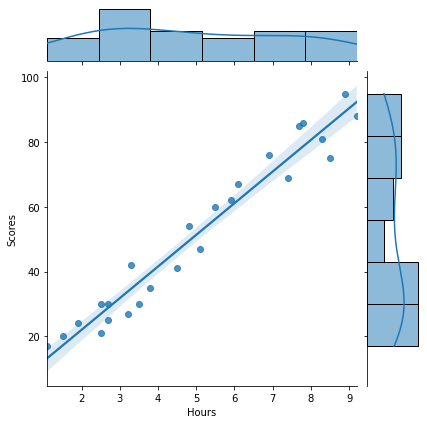

In [9]:
sns.jointplot(x="Hours", y="Scores", data=df, kind="reg");

here we assign the variables x= hours and y= scores

In [10]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

Now we will use train_test_split function to divide the data, whereas we have assigned 30% of data for testing. Remaining data is for training

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                test_size=0.3, random_state=0) 

Now we are importing Linear refression from sklearn.linear_model() package.
we have created variable name "regressor" for Linearregression
next, we are fitting data using .fit() command
we are making predictions using .predict command

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
pred1=regressor.predict(x_train)

using Matplotlib we are ploting grpgh which shows the regression line passing through data. the '.' are the datapoints.

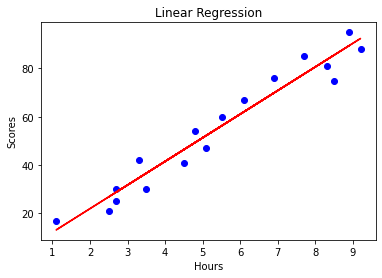

In [13]:
plt.scatter(x_train, y_train, color = 'blue') 
  
plt.plot(x_train, regressor.predict(x_train), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Hours') 
plt.ylabel('Scores') 
  
plt.show() 

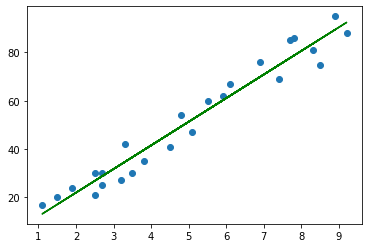

In [14]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color= 'green');
plt.show()

Now we will start making predictions using test data.

In [15]:
print(x_test)

y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


we are comparing the results with actual values 

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


Now we are evaluating the performance of the algorithm by testing with some data. Here we will test with 9.25 as our hours data and now the output value predicts the score of the student.

In [18]:
own_pred = regressor.predict([[9.25]])
print("No of Hours = {}".format(9.25))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.419727808027652
MSE: 22.96509721270043
RMSE: 4.792191274636315
